
### Linear Regression Project

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

    Avg. Session Length: Average session of in-store style advice sessions.
    Time on App: Average time spent on App in minutes
    Time on Website: Average time spent on Website in minutes
    Length of Membership: How many years the customer has been a member.


In [5]:
df=pd.read_csv("Ecommerce Customers.csv")
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


### Let's explore the data!

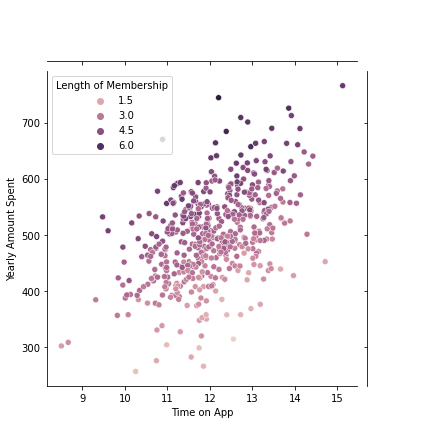

In [11]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent',hue='Length of Membership')

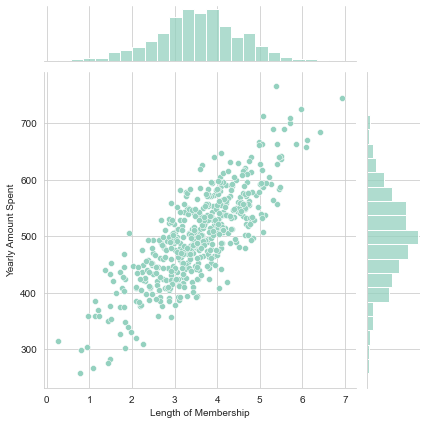

In [20]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

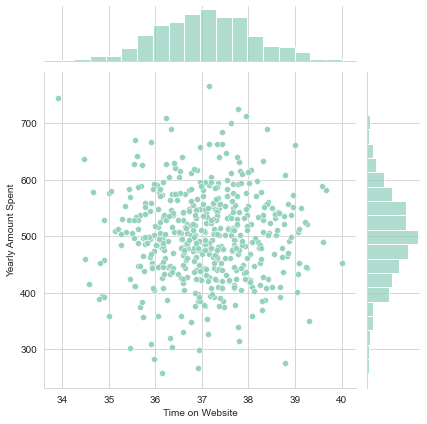

In [17]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

### Training Data
Now that we've done the data. Let's go ahead and split the data into training and testing sets.
Set features equal to the numerical columns and a target equal to the "Yearly Amount Spent" feature.

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']], df['Yearly Amount Spent'], test_size=0.3, random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm=LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
print('Intercept: \n',lm.intercept_)
print('Coefficients: \n',lm.coef_)

Intercept: 
 -1047.932782250239
Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
our model have been fit, let's evaluate its performance by predicting off the test values!

In [29]:
pred=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

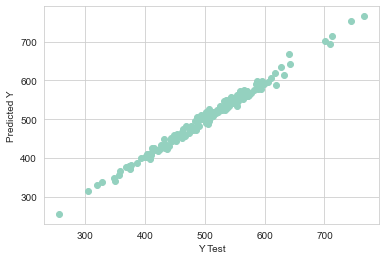

In [30]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
Plot a histogram of the residuals and make sure it looks normally distributed.

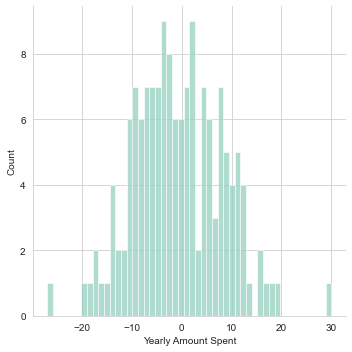

In [36]:
sns.displot((y_test-pred),bins=50)

### Conclusion

In [51]:
coeffecients = pd.DataFrame(lm.coef_,index=['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'])
coeffecients.columns=['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!